# Utilizando Naive Bayes na base de dados Credit Data

### Utilizando como referência o código já feito anteriormente do arquivo 'template_credit_data.ipynb'

In [3]:
import pandas as pd

In [4]:
base = pd.read_csv('credit_data.csv')

In [5]:
base.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [6]:
base.loc[base.age > 0, 'age'].mean()

40.92770044906149

In [7]:
base.loc[base.age < 0, 'age'] = 40.92

In [8]:
previsores = base.iloc[:, 1:4].values
classe = base.iloc[:, 4].values

In [9]:
from sklearn.impute import SimpleImputer
import numpy as np

In [10]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [11]:
imputer = imputer.fit(previsores[:, 1:4])
previsores[:, 1:4] = imputer.transform(previsores[:, 1:4])

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
previsores = scaler.fit_transform(previsores)

Fazendo a divisão de dados entre treinamento e teste:

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25, random_state=0)

In [17]:
previsores_treinamento

array([[-1.3754462 ,  0.50631087,  0.10980934],
       [ 1.45826409, -1.6489393 , -1.21501497],
       [-0.79356829,  0.22531191, -0.43370226],
       ...,
       [ 0.21738243, -0.14704404,  1.40872498],
       [ 0.58716195,  0.66435493,  0.67948086],
       [ 0.68315357,  0.04084946,  1.91819744]])

In [18]:
previsores_teste

array([[ 1.59301567, -1.35435846,  2.58262733],
       [ 0.99769755,  0.99806572,  0.84418709],
       [-0.42485257,  0.55812622, -1.15785286],
       ...,
       [ 1.37445674, -1.05746281, -1.12564819],
       [-1.57087737, -0.63488173, -0.36981671],
       [-1.03572293, -0.93978122,  0.04244312]])

In [19]:
classe_treinamento

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
classe_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
classificador = GaussianNB()

In [23]:
classificador.fit(previsores_treinamento, classe_treinamento)

GaussianNB()

In [24]:
previsoes = classificador.predict(previsores_teste)

##### Fazendo a comparação entre as previsões do classificador com a variável 'classe_teste' (que já possui as respostas prontas)

##### Agora será analisado se as previsões serão acertadas comparando com a 'classe_teste'

In [25]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [26]:
classe_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Se pararmos para analisar, veremos que nos últimos registros, as previsões erraram em relação à variável 'classe_teste'. Vemos que os últimos 2 registros, originalmente, valem 1. No entando, as previsões resultaram em 0.

##### Fazendo a comparação entre a previsão e a 'classe_teste':

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [28]:
precisao = accuracy_score(classe_teste, previsoes)

In [29]:
precisao

0.938

93% é o percentual de acerto desse algorítmo

In [30]:
matriz = confusion_matrix(classe_teste, previsoes)

In [31]:
matriz

array([[428,   8],
       [ 23,  41]], dtype=int64)

Vale lembrar que, nessa base de dados, o 0 corresponde a quem não pagou e o 1 corresponde a quem pagou.

Na matriz, essas duas classes estão correspondem às linhas! Linha 0: quem originalmente não pagou. Linha 1: quem originalmente pagou. Coluna 0: quem o algorítmo classificou como não pagou. Coluna 1: quem o algorítmo classificou como pagou.

Na intersecção entre 0 e 0, interpretamos, no caso, como: 428 pertencem à classe 0 e o algorítmo classificou-os como classe 0. 8 percentem à classe 0, porém o algorítmo classificou-os como da classe 1. 23 correspondem à classe 0 e o algorítmo classificou-os como classe 0. 41 correspondem à classe 0, porém o algorítmo classificou-os como classe 1.

In [35]:
from sklearn.metrics import plot_confusion_matrix

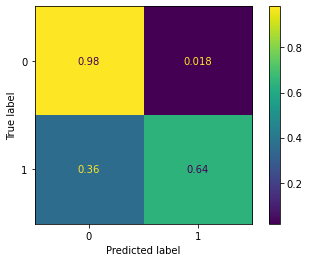

In [37]:
predictions = classificador.predict(previsores_teste)

matrix = plot_confusion_matrix(classificador, previsores_teste, classe_teste, normalize='true')